In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
style.use("ggplot")

data = pd.read_csv("student-mat.csv", sep=";")

predict = "G3"

In [3]:
data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data) 

In [4]:
x = np.array(data.drop([predict], 1))
y =np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [5]:
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: 0.8006372770423452
Accuracy: 0.8164890583914161
Accuracy: 0.8733782731063529
Accuracy: 0.8194870337263191
Accuracy: 0.7678145668581425
Accuracy: 0.7373408713464193
Accuracy: 0.8824773855601173
Accuracy: 0.935967303435389
Accuracy: 0.8464006771829496
Accuracy: 0.8443390859643647
Accuracy: 0.8201204358906259
Accuracy: 0.7489862038381476
Accuracy: 0.8039289026227023
Accuracy: 0.7569081760701267
Accuracy: 0.6608582035462947
Accuracy: 0.7423473218735905
Accuracy: 0.8428043809669418
Accuracy: 0.8855632723964892
Accuracy: 0.7857737900949415
Accuracy: 0.9206917350413268


In [6]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])

-------------------------
Coefficient: 
 [ 0.15828695  0.96921156  0.0366213  -0.32016732 -0.20578357]
Intercept: 
 -1.4088705225572884
-------------------------
12.208298391061842 [12 12  8  0  1] 12
11.88177560505262 [13 12  6  0  3] 12
3.449390936556753 [6 5 0 1 3] 0
11.021501491406205 [11 11 12  0  2] 11
12.837042964600307 [13 13  0  0  2] 13
5.109887247824458 [ 6  6 22  2  2] 4
11.917470461371874 [11 12 10  0  2] 13
11.334598606306658 [12 12  1  0  4] 12
6.768592763729787 [6 8 0 1 1] 8
6.871269797256517 [10  8  3  3  1] 7
11.577003473785815 [12 12  2  0  3] 11
11.929272228003255 [12 12  6  0  2] 12
8.851548829049204 [10  9 10  0  2] 10
8.984781253075216 [10  9 28  1  3] 9
12.910285555759163 [13 13  2  0  2] 11
14.136772625199859 [15 14  6  0  3] 14
10.92251293203913 [10 11  8  0  1] 10
12.341765811062889 [14 12  3  0  1] 12
7.884289507172026 [6 9 4 1 1] 8
18.900046860344702 [18 18  6  0  1] 18
15.458252940541827 [15 15 10  0  2] 15
-1.7837213232234428 [5 0 0 3 1] 0
11.837520769124

No handles with labels found to put in legend.


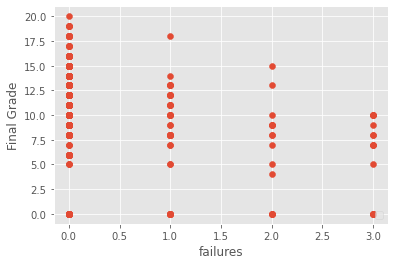

In [7]:
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()